# Bounding Box testing

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
from lib.Plot import plot
import matplotlib.pyplot as plt

In [2]:
X_train = np.load("lib/datasets/train_signs3k.npy")
#X_test = np.load("lib/datasets/test_signs.npy")
X_val = np.load("lib/datasets/val_signs3k.npy")
y_train = np.load("lib/datasets/train_labels_e3k.npy")
#y_test = np.load("lib/datasets/test_labels_e.npy")
y_val = np.load("lib/datasets/val_labels_e3k.npy")
z_train = np.load("lib/datasets/train_bboxes3k.npy")
#z_test = np.load("lib/datasets/test_bboxes.npy")
z_val = np.load("lib/datasets/val_bboxes3k.npy")

In [3]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, ZeroPadding2D, BatchNormalization, Input, InputLayer

In [4]:
alex_in = Input(shape=X_train.shape[1:])
alex = Conv2D(96,(11,11),strides=4,activation='relu',padding='valid')(alex_in)
alex = MaxPool2D((3,3),strides=2)(alex)
alex = BatchNormalization()(alex)

alex = ZeroPadding2D(padding=2)(alex)
alex = Conv2D(256,(5,5),activation='relu',padding='same')(alex)
alex = MaxPool2D((3,3), strides=2)(alex)
alex = BatchNormalization()(alex)

alex = ZeroPadding2D(padding=1)(alex)
alex = Conv2D(384,(3,3),activation='relu',padding='same')(alex)

alex = ZeroPadding2D(padding=1)(alex)
alex = Conv2D(384,(3,3),activation='relu',padding='same')(alex)

alex = ZeroPadding2D(padding=1)(alex)
alex = Conv2D(256,(3,3),activation='relu',padding='same')(alex)

alex = Flatten()(alex)
alex = Dense(4096,activation="relu")(alex)
alex = Dropout(rate=0.5)(alex)
alex = Dense(4096,activation="relu")(alex)
alex = Dropout(rate=0.5)(alex)
alex_out = Dense(47,activation="softmax")(alex)

callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
alex_net = Model(inputs = alex_in, outputs = alex_out)
alex_net.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
epochs = 35
history = alex_net.fit(X_train, y_train, batch_size = 32, epochs= epochs, validation_data=(X_val,y_val))

Epoch 1/35


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model/dense/MatMul/MatMul_1' defined at (most recent call last):
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2915, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3186, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\dokee\AppData\Local\Temp/ipykernel_26532/3583396897.py", line 33, in <module>
      history = alex_net.fit(X_train, y_train, batch_size = 32, epochs= epochs, validation_data=(X_val,y_val))
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 531, in minimize
      loss, var_list=var_list, grad_loss=grad_loss, tape=tape)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\dokee\anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model/dense/MatMul/MatMul_1'
OOM when allocating tensor with shape[102400,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model/dense/MatMul/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1584]

In [ ]:
from lib.Plot import plot
plot(history)

In [ ]:
alex_net.save("App/lib/models/AlexNet_bb")

In [4]:
alex_net = tf.keras.models.load_model('App/lib/models/AlexNet_bb')
alex_net = Model(alex_net.input,alex_net.layers[-7].output)
alex_net.trainable = False

In [5]:
flatten = alex_net.output
flatten = Flatten()(flatten)

bbox_head = Dense(128, activation="relu")(flatten)
bbox_head = Dense(64, activation="relu")(bbox_head)
bbox_head = Dense(32, activation="relu")(bbox_head)
bbox_head = Dense(4, activation="sigmoid",name="bounding_box")(bbox_head)

model = Model(inputs=alex_net.input, outputs = bbox_head)
model.compile(loss = "mean_squared_error", optimizer = "Adam", metrics = ["accuracy"])
callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.1, patience=5, verbose=1,
    mode='max', min_delta=0.0001, cooldown=2, min_lr=0)
epochs = 35
history = model.fit(X_train, z_train, batch_size=32, epochs=epochs,
validation_data=(X_val, z_val))

Epoch 1/35
122/122 [==============================] - 8s 30ms/step - loss: 0.1834 - accuracy: 0.0085 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 2/35
122/122 [==============================] - 3s 22ms/step - loss: 0.1835 - accuracy: 0.0000e+00 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 3/35
122/122 [==============================] - 3s 22ms/step - loss: 0.1835 - accuracy: 0.0000e+00 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 4/35
122/122 [==============================] - 3s 22ms/step - loss: 0.1835 - accuracy: 0.0000e+00 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 5/35
122/122 [==============================] - 3s 22ms/step - loss: 0.1835 - accuracy: 0.0000e+00 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 6/35
122/122 [==============================] - 3s 22ms/step - loss: 0.1835 - accuracy: 0.0000e+00 - val_loss: 0.1874 - val_accuracy: 0.0000e+00
Epoch 7/35
122/122 [==============================] - 3s 22ms/step - loss: 0.1835 - accuracy: 0.00

KeyboardInterrupt: 

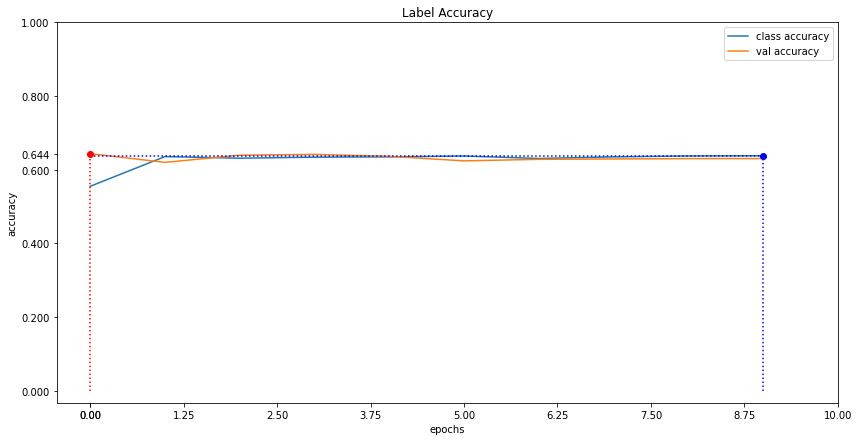

In [7]:
plot(history)